## <span style="color:blue">  Numerical exercises 9</span>

### The Traveling Salesman Problem

The traveling salesman problem (TSP) consists of a salesman and a set of $N$ cities with positions $\vec{c}_i$. The salesman **has to visit each one of the cities starting from a certain one (e.g. the hometown) and returning to the same city**. The challenge of the problem is that the traveling salesman wants to **minimize the total length of the trip**.

Consider now the ordered sequence of cities, $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, which goes from city 1 to the n$^{th}$ city. The path that minimizes the following loss/cost function: 

$$
L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|^2
$$

or 
$$
L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|
$$


- I use selection operator which simply uses the order in the orderd population with $M$ individuals, e.g. select the individual $j$ with the algorithm: $j= int(M \times r^p)+1$ where $r$ is a uniform random number $r\in[0,1)$ and $p$ a convenient exponent.

- *crossover* operator:
    given a selected mother and father, e.g. 
    $$
    \left[ 1, 2, 3, 4, 5 \right]\\
    \left[ 1, 5, 4, 3, 2 \right] 
    $$
    1. cut their paths at the same position:
    $$
    \left[ 1, 2, 3 | 4, 5 \right]\\
    \left[ 1, 5, 4 | 3, 2 \right] 
    $$
    2. conserve the first part of the paths:
    $$
    \left[ 1, 2, 3 | X, Y \right]\\
    \left[ 1, 5, 4 | X, Y \right] 
    $$
    3. complete the paths with the missing cities adding them in the **order** in which they appear in the consort:
    $$
    \left[ 1, 2, 3 | 5, 4 \right]\\
    \left[ 1, 5, 4 | 2, 3 \right] 
    $$

    Here you are: you have two sons that you can add to the new generation ... and so on!

- *genetic-mutation* operators:
    1. pair permutation of cities (except for the first city), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 2, 4, 3, 5 \right]$ (At this point you should already have such operator ... how have you generated the starting population?).
    2. shift of $+n$ positions for $m$ contiguous cities (except for the first city and $m \lt N-1$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 5, 2, 3 \right] $ for a $+2$ shift of the second and third cities.
    3. permutation among $m$ contiguous cities (except for the first city) with other (different!) $m$ contiguous cities ($m<N/2$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 5, 2, 3 \right] $ for a permutation of the second and third cities with the last 2.
    4. inversion of the order in which they appear in the path of $m$ cities (except for the first city and $m \le N$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 3, 2, 5 \right]$ for the inversion of the cities from 2 to 4.


Apply your code to the optimization of a path among 

- <span style="color:blue">34 cities randomly placed **on** a circumference</span>
- <span style="color:blue">34 cities randomly placed **inside** a square</span>

Show your results via:

- <span style="color:red">a picture of $L^{(2)}$ (or $L^{(1)}$) of the best path and of $\langle L^{(2)}\rangle$ (or $\langle L^{(1)}\rangle$), averaged on the best half of the population, as a function of the iterations/generations of your algorithm</span>
- <span style="color:red">a picture of the best path in cartesian coordinates</span>

GA parameters:
- n_individuals  = 1000
- n_generations  = 200
- n_cities       = 34
- mutation_prob  = 0.2 (there are 4 possible mutations with 25% of probabilty each)
- crossover_prob = 0.85
- selction_exp   = 3

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 15})

### CIRCLE MAP

- I will show the plots of the best loss function for each generation and the final trip after the GA 

In [5]:
generation, mean_loss, best_loss = np.loadtxt("../c++/es 9/OUTPUT/circle/Mean_loss.dat", usecols=(0,1,2), unpack = True)

best loss =  2.37096


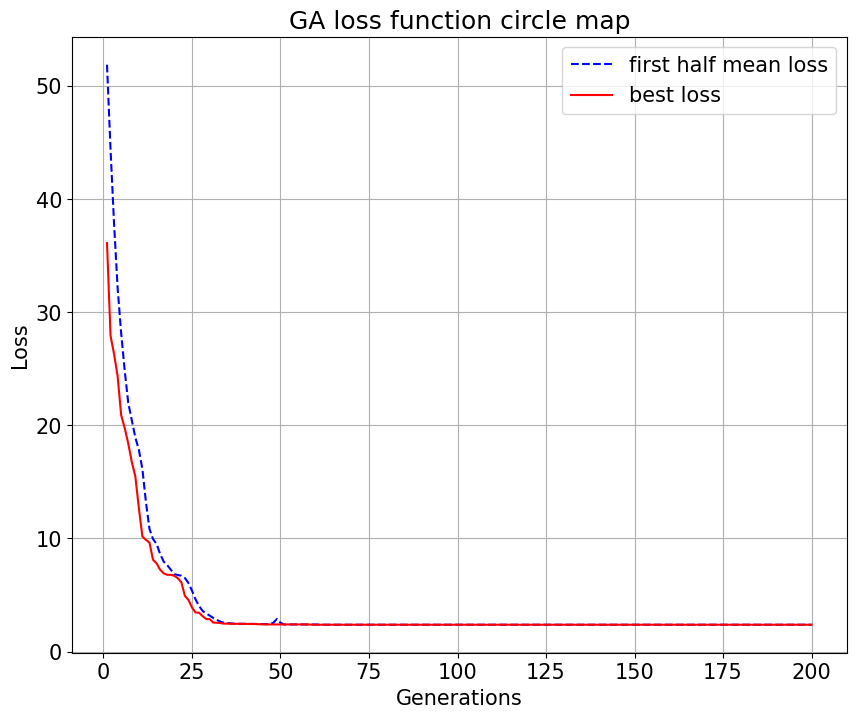

In [6]:
plt.figure(figsize=(10,8))
plt.plot(generation,mean_loss,color="blue",label="first half mean loss",ls="--")
plt.plot(generation,best_loss,color="red",label="best loss")
plt.xlabel("Generations")
plt.ylabel("Loss")
plt.grid()
plt.legend()
plt.title("GA loss function circle map");
print("best loss = ", best_loss[-1])

- After about 30 generations the loss function became $\approx$ costant

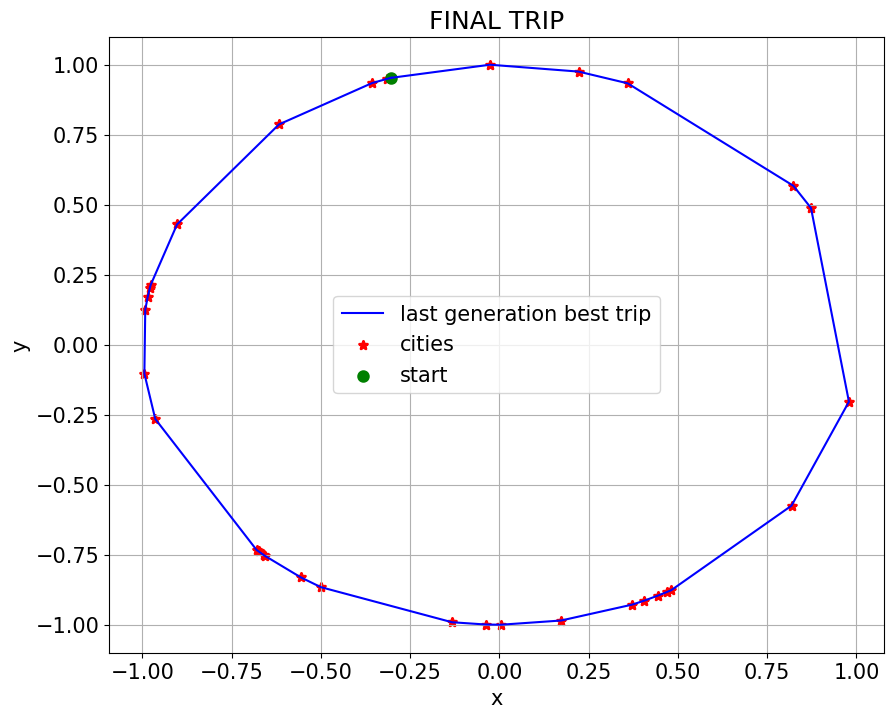

In [83]:
x,y = np.loadtxt("../c++/es 9/OUTPUT/circle/final_trip.dat", usecols=(0,1), unpack = True)
plt.figure(figsize=(10,8))
plt.plot(x,y,label="last generation best trip",color="blue")
plt.scatter(x,y,label="cities",marker="*",color="red",lw=2)
plt.scatter(x[0],y[0],label="start",color="green",lw=3)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.title("FINAL TRIP");

### SQUARED MAP

GA parameters:
- n_individuals  = 1000
- n_generations  = 200
- n_cities       = 34
- mutation_prob  = 0.2 (there are 4 possible mutations with 25% of probabilty each)
- crossover_prob = 0.8
- selction_exp   = 5

best loss =  1.04883


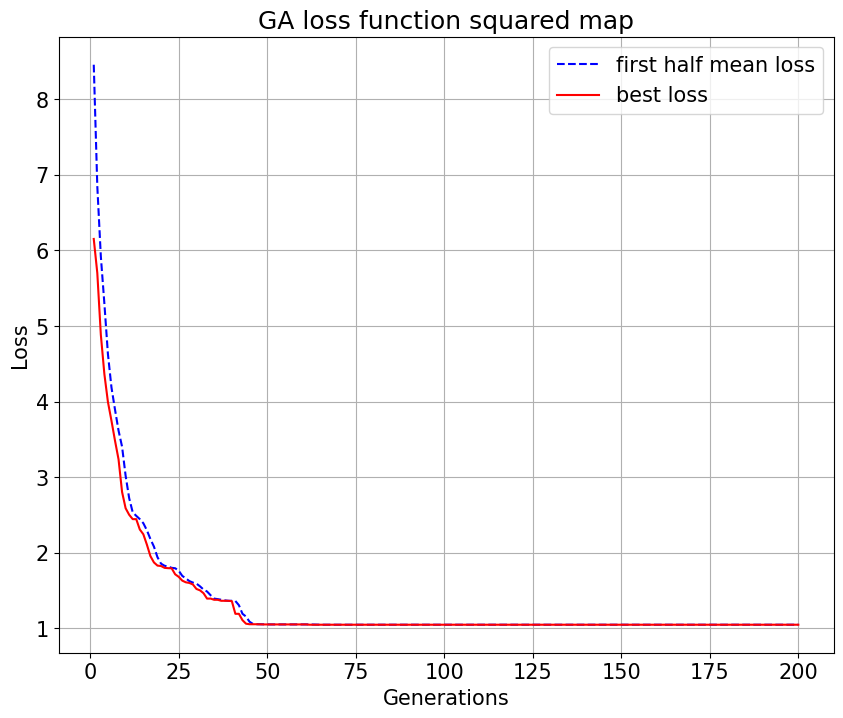

In [84]:
generation, mean_loss, best_loss = np.loadtxt("../c++/es 9/OUTPUT/square/Mean_loss.dat", usecols=(0,1,2), unpack = True)
#generation, mean_loss, best_loss = np.loadtxt("../c++/es 9/SOURCE/Mean_loss.dat", usecols=(0,1,2), unpack = True)
plt.figure(figsize=(10,8))
plt.plot(generation,mean_loss,color="blue",label="first half mean loss",ls="--")
plt.plot(generation,best_loss,color="red",label="best loss")
plt.xlabel("Generations")
plt.ylabel("Loss")
plt.grid()
plt.legend()
plt.title("GA loss function squared map");
print("best loss = ", best_loss[-1])

- After about 50 generations the loss became $\approx$ costant

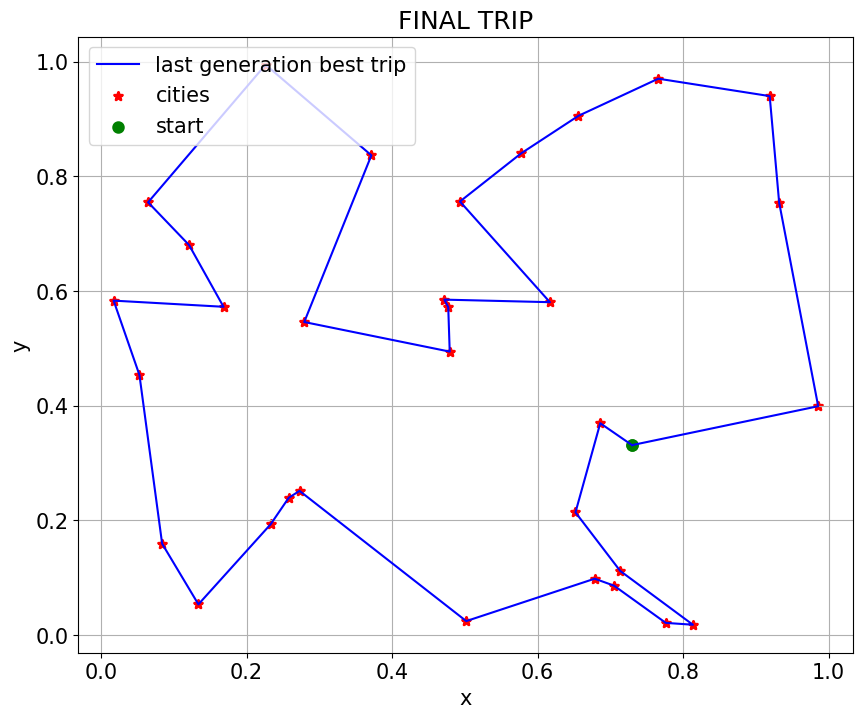

In [81]:
x,y = np.loadtxt("../c++/es 9/OUTPUT/square/final_trip.dat", usecols=(0,1), unpack = True)
#x,y = np.loadtxt("../c++/es 9/SOURCE/final_trip.dat", usecols=(0,1), unpack = True)
plt.figure(figsize=(10,8))
plt.plot(x,y,label="last generation best trip",color="blue")
plt.scatter(x,y,label="cities",marker="*",color="red",lw=2)
plt.scatter(x[0],y[0],label="start",color="green",lw=3)
plt.scatter(x[-1],y[-1],color="green",lw=3)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.title("FINAL TRIP");